In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# Load Boston Houses Dataset

In [ ]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.boston_housing.load_data()

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_data.shape

(404, 13)

train_labels.shape

In [ ]:
test_labels.shape

(102,)

In [ ]:
train_labels.shape, train_labels.dtype, train_labels[1:4]

((404,), dtype('float64'), array([42.3, 50. , 21.1]))

### check shapes and types

In [ ]:
type(train_data), train_data.dtype, train_data.shape

(numpy.ndarray, dtype('float64'), (404, 13))

In [ ]:
type(train_labels), train_labels.dtype, train_labels.shape

(numpy.ndarray, dtype('float64'), (404,))

### reshape to (-1, 1)

In [ ]:
train_labels = np.reshape(train_labels, newshape=(-1, 1))
test_labels = np.reshape(test_labels, newshape=(-1, 1))
train_labels.shape, test_labels.shape

((404, 1), (102, 1))

In [ ]:
test_labels

### check min and max of data

In [ ]:
np.max(train_data, axis=0)

array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.725 ,
       100.    ,  10.7103,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  ])

In [ ]:
np.min(train_data, axis=0)

array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8800e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00])

In [ ]:
np.max(train_labels)

50.0

In [ ]:
np.min(train_labels)

5.0

# Normalize the data

### using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
my_scaler = MinMaxScaler()
my_scaler.fit(train_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
train_data = my_scaler.transform(train_data)

In [ ]:
np.max(train_data, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
np.min(train_data, axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### just transform to test data

In [ ]:
test_data = my_scaler.transform(test_data)

In [ ]:
np.max(test_data, axis=0)

array([0.28144109, 0.9       , 1.        , 1.        , 1.        ,
       1.01065066, 1.        , 1.14781801, 1.        , 1.        ,
       0.91489362, 1.        , 0.83498896])

In [ ]:
np.min(test_data, axis=0)

array([ 7.63179629e-05,  0.00000000e+00,  2.78592375e-02,  0.00000000e+00,
        1.44032922e-02,  2.55422153e-01,  3.19258496e-02,  3.50600687e-02,
        0.00000000e+00, -1.91204589e-03,  4.25531915e-02,  6.13495386e-02,
        5.24282561e-03])

In [ ]:
np.min(test_labels), np.max(test_labels)

(5.6, 50.0)

# Creating the regression model

### import layers and model

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

### create the model

In [ ]:
input_layer = Input((13, ))
hidden_layer = Dense(units=4, activation='relu')(input_layer)
prediction = Dense(units=1)(hidden_layer)
regression_model = Model(input_layer, prediction)

### print summary of the model

In [ ]:
regression_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


## Compile the model with optimizer and loss function

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
regression_model.compile(optimizer='adam', loss='mse')

## Now we can train the model

In [ ]:
regression_model.fit(x=train_data, y=train_labels, batch_size=100, epochs=200, validation_data=(test_data, test_labels))

Epoch 1/200
5/5 [==============================] - 0s 24ms/step - loss: 23.0807 - val_loss: 22.9209
Epoch 2/200
5/5 [==============================] - 0s 13ms/step - loss: 23.0811 - val_loss: 22.9579
Epoch 3/200
5/5 [==============================] - 0s 12ms/step - loss: 23.0764 - val_loss: 22.9724
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 23.0752 - val_loss: 22.9742
Epoch 5/200
5/5 [==============================] - 0s 11ms/step - loss: 23.0721 - val_loss: 22.9785
Epoch 6/200
5/5 [==============================] - 0s 12ms/step - loss: 23.0767 - val_loss: 23.0083
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 23.0692 - val_loss: 22.9968
Epoch 8/200
5/5 [==============================] - 0s 13ms/step - loss: 23.0669 - val_loss: 22.9802
Epoch 9/200
5/5 [==============================] - 0s 12ms/step - loss: 23.0647 - val_loss: 22.9535
Epoch 10/200
5/5 [==============================] - 0s 10ms/step - loss: 23.0669 - val_loss: 22.9200

### plot model history

In [ ]:
model_loss_history = pd.DataFrame(regression_model.history.history)

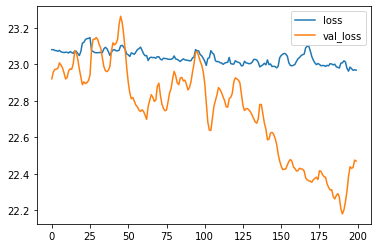

In [ ]:
model_loss_history.plot()

## Evaluate the model

In [ ]:
predictions = regression_model.predict(test_data, batch_size=16)
predictions[1], test_labels[1]

(array([20.84252], dtype=float32), array([18.8]))

In [ ]:
len(predictions)

102

In [ ]:
errors = 0.0
for idx in range(len(predictions)):
    if abs(predictions[idx] - test_labels[idx]) > 5.0:
        errors += 1.0
        
1 - (errors / len(predictions))        

0.8137254901960784

# Creating another regression model with more hidden layer

### import layers and model

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

### create the model

In [ ]:
input_layer = Input((13, ))
first_hidden_layer = Dense(units=13, activation='relu')(input_layer)
second_hidden_layer = Dense(units=8, activation='relu')(first_hidden_layer)
third_hidden_layer = Dense(units=4, activation='relu')(second_hidden_layer)
prediction = Dense(units=1)(third_hidden_layer)

regression_model_2 = Model(input_layer, prediction)

### print summary of the model

In [ ]:
regression_model_2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_10 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


## Compile the model with optimizer and loss function

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
regression_model_2.compile(optimizer='adam', loss='mse')

## Now we can train the model

In [ ]:
regression_model_2.fit(x=train_data, y=train_labels, batch_size=8, epochs=200, validation_data=(test_data, test_labels))

Epoch 1/200
51/51 [==============================] - 1s 4ms/step - loss: 586.9650 - val_loss: 571.6182
Epoch 2/200
51/51 [==============================] - 0s 2ms/step - loss: 507.9428 - val_loss: 431.8904
Epoch 3/200
51/51 [==============================] - 0s 2ms/step - loss: 376.0801 - val_loss: 251.8058
Epoch 4/200
51/51 [==============================] - 0s 2ms/step - loss: 194.4432 - val_loss: 154.4199
Epoch 5/200
51/51 [==============================] - 0s 2ms/step - loss: 143.6406 - val_loss: 131.9382
Epoch 6/200
51/51 [==============================] - 0s 2ms/step - loss: 128.2536 - val_loss: 114.9745
Epoch 7/200
51/51 [==============================] - 0s 2ms/step - loss: 115.1467 - val_loss: 100.4426
Epoch 8/200
51/51 [==============================] - 0s 2ms/step - loss: 87.6157 - val_loss: 88.1264
Epoch 9/200
51/51 [==============================] - 0s 2ms/step - loss: 75.7498 - val_loss: 77.2953
Epoch 10/200
51/51 [==============================] - 0s 2ms/step - loss: 64.

### plot model history

In [ ]:
model_loss_history = pd.DataFrame(regression_model_2.history.history)

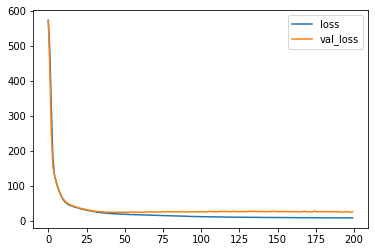

In [ ]:
model_loss_history.plot()

## Evaluate the model

In [ ]:
predictions_2 = regression_model_2.predict(test_data, batch_size=16)
predictions_2[1], test_labels[1]

(array([18.84622], dtype=float32), array([18.8]))

In [ ]:
errors = 0.0
for idx in range(len(predictions_2)):
    if abs(predictions_2[idx] - test_labels[idx]) > 5.0:
        errors += 1.0
        
1 - (errors / len(predictions_2))        

0.7843137254901961

# Creating another regression model with more hidden layer
## This time with early stopping

### import layers and model

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

### create the model

In [ ]:
input_layer = Input((13, ))
first_hidden_layer = Dense(units=13, activation='relu')(input_layer)
second_hidden_layer = Dense(units=8, activation='relu')(first_hidden_layer)
third_hidden_layer = Dense(units=4, activation='relu')(second_hidden_layer)
prediction = Dense(units=1)(third_hidden_layer)

regression_model_3 = Model(input_layer, prediction)

### print summary of the model

In [ ]:
regression_model_3.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_14 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 112       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 5         
Total params: 335
Trainable params: 335
Non-trainable params: 0
_________________________________________________________________


## Compile the model with optimizer and loss function

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
regression_model_3.compile(optimizer='adam', loss='mse')

## create early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1 )

## Now we can train the model

In [ ]:
regression_model_3.fit(x=train_data, y=train_labels, batch_size=8, epochs=200, validation_data=(test_data, test_labels), callbacks=[early_stop])

Epoch 1/200
51/51 [==============================] - 1s 4ms/step - loss: 568.1465 - val_loss: 613.9294
Epoch 2/200
51/51 [==============================] - 0s 2ms/step - loss: 560.9888 - val_loss: 609.7867
Epoch 3/200
51/51 [==============================] - 0s 2ms/step - loss: 586.8937 - val_loss: 604.8984
Epoch 4/200
51/51 [==============================] - 0s 2ms/step - loss: 536.7574 - val_loss: 595.5812
Epoch 5/200
51/51 [==============================] - 0s 2ms/step - loss: 533.3368 - val_loss: 569.7311
Epoch 6/200
51/51 [==============================] - 0s 2ms/step - loss: 569.4637 - val_loss: 511.8553
Epoch 7/200
51/51 [==============================] - 0s 2ms/step - loss: 451.2470 - val_loss: 416.3839
Epoch 8/200
51/51 [==============================] - 0s 2ms/step - loss: 349.7446 - val_loss: 281.3255
Epoch 9/200
51/51 [==============================] - 0s 5ms/step - loss: 240.4177 - val_loss: 161.7742
Epoch 10/200
51/51 [==============================] - 0s 2ms/step - loss:

### plot model history

In [ ]:
model_loss_history = pd.DataFrame(regression_model_3.history.history)

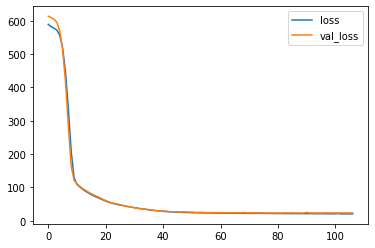

In [ ]:
model_loss_history.plot()

## Evaluate the model

In [ ]:
predictions_3 = regression_model_3.predict(test_data, batch_size=16)
predictions_3 [4]


array([24.631407], dtype=float32)

In [ ]:
test_labels[4]

array([22.2])

In [ ]:
errors = 0.0
for idx in range(len(predictions_3)):
    if abs(predictions_3[idx] - test_labels[idx]) > 5.0:
        errors += 1.0
        
1 - (errors / len(predictions_3))        

0.8235294117647058